![NetworkX](networkx.png)

https://networkx.github.io/

sources https://github.com/networkx

## Creating a graph

Create an empty graph with no nodes and no edges.

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

## Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we'll look at simple manipulations. You can add one node at a time,

In [ ]:
G.add_node(1)

add a list of nodes,

In [ ]:
G.add_nodes_from([2, 3])

or add any `nbunch` of nodes. An nbunch is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..)

In [ ]:
H = nx.path_graph(10)

In [ ]:
G.add_nodes_from(H)

Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [ ]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer. (Note: You should not change the node object if the hash depends on its contents.)

##Edges

G can also be grown by adding one edge at a time,

In [ ]:
G.add_edge(1, 2)

In [ ]:
e = (2, 3)

In [ ]:
G.add_edge(*e) # unpack edge tuple*

by adding a list of edges,

In [ ]:
G.add_edges_from([(1, 2),(1, 3)])

or by adding any `ebunch` of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2, 3, {'weight' : 3.1415}). Edge attributes are discussed further below

In [ ]:
G.add_edges_from(H.edges())

One can demolish the graph in a similar fashion; using `Graph.remove_node`, `Graph.remove_nodes_from`, `Graph.remove_edge` and `Graph.remove_edges_from`, e.g.

In [ ]:
G

In [9]:
import matplotlib.pyplot as plt

In [25]:
# drawing reference https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

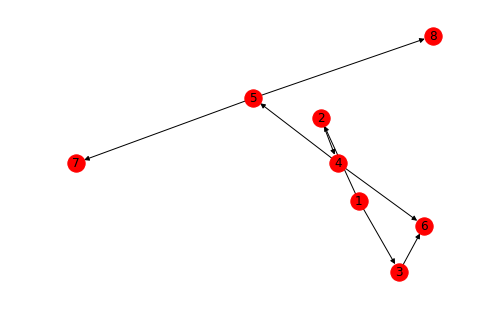

In [19]:
nx.draw(G, with_labels = True)

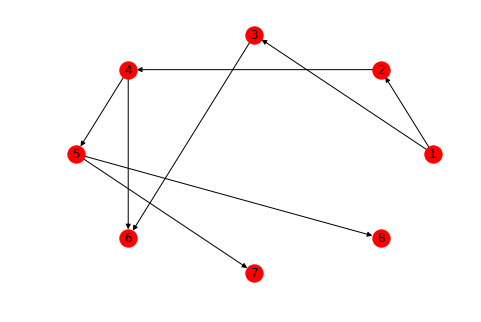

In [20]:
nx.draw_shell(G, with_labels = True)

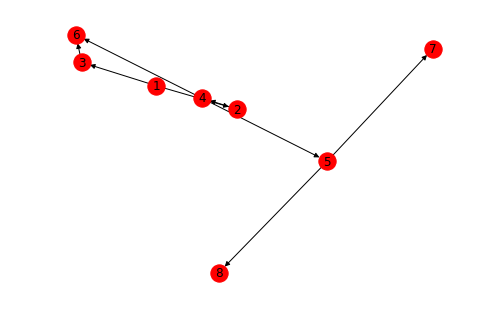

In [22]:
nx.draw_spring(G, with_labels = True)

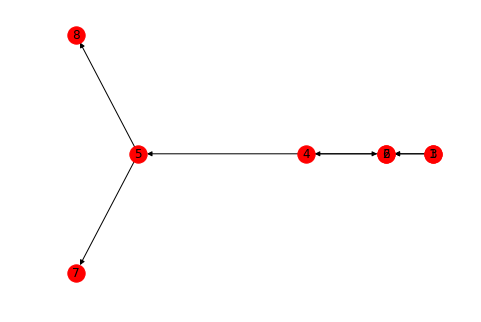

In [23]:
nx.draw_spectral(G, with_labels = True)

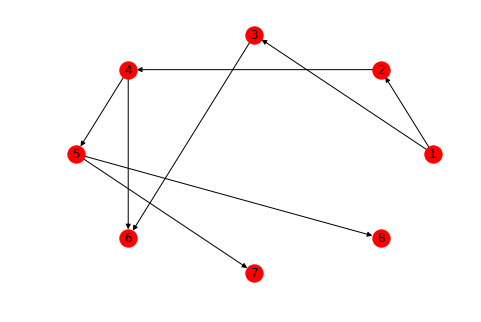

In [24]:
nx.draw_circular(G, with_labels= True)

In [ ]:
G.nodes

In [ ]:
G.edges

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
list(G.nodes)

In [ ]:
G.remove_node(H)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [ ]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
G.add_node(1)

In [ ]:
G.add_edge(1, 2)

In [ ]:
G.add_node("spam")       # adds node "spam"

In [ ]:
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

At this stage the graph G consists of 8 nodes and 2 edges, as can be seen by:

In [ ]:
G.number_of_nodes()

In [ ]:
G.number_of_edges()

We can examine them with

In [ ]:
list(G.nodes())  # G.nodes() returns an iterator of nodes.

In [ ]:
list(G.edges())  # G.edges() returns an iterator of edges.

In [ ]:
list(G.neighbors(1))  # G.neighbors(n) returns an iterator of neigboring nodes of n

Removing nodes or edges has similar syntax to adding:

In [ ]:
G.remove_nodes_from("spam")

In [ ]:
list(G.nodes())

In [ ]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph classes you can specify data in several formats.

In [ ]:
H = nx.DiGraph(G)  # create a DiGraph using the connections from G

In [ ]:
list(H.edges())

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]

In [ ]:
H = nx.Graph(edgelist)

# Digraphs - directed graphs

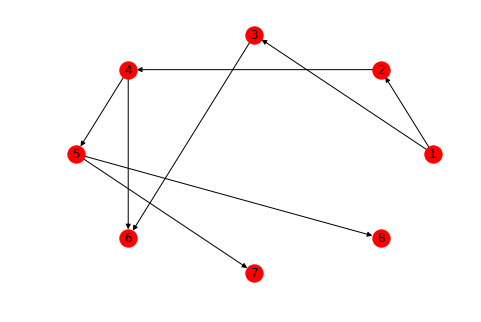

In [30]:
import networkx as nx
# !pip install nxpd not using since matplotlib works well enough
# from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(range(1,9))
G.add_edges_from([(1,2),(1,3),(2,4),(3,6),(4,5),(4,6),(5,7),(5,8)])
nx.draw_circular(G, with_labels = True) # can anyone answer why with_labels defaults to False ? :)

In [37]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'H', 'G'))

[0.0, 0.0, 0.0, 0.75, 0.75, 0.75, 0.75, 0.75]


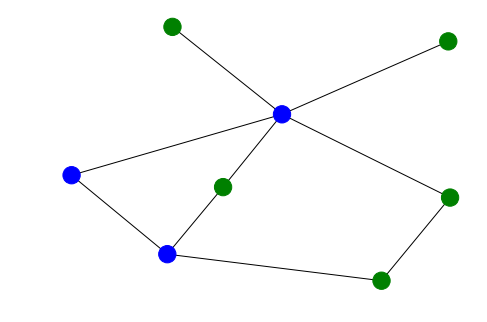

In [42]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
#           'D': 0.5714285714285714,
           'H': 0.0}

# little two color coloring
values = [ 0.75*(node > 'C') for node in G.nodes()]

color_map = []
for node in G:
    if node < 'D':
        color_map.append('blue')
    else: color_map.append('green')
print(values)

#nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
nx.draw(G, node_color=color_map)


# we can also set node attibutes
# https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html

### Exercise
### Enter into NetworkX this graph and display it

![Diamond Graph](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Diamond_graph.svg/179px-Diamond_graph.svg.png)

## Bonus round for something more complicated
![Complete Bipartite Graph](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Biclique_K_3_5.svg/255px-Biclique_K_3_5.svg.png)

In [ ]:
# need http://www.graphviz.org/
# TODO we skip this as setting PATH on each user machine is too painful

https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [3]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\vdell\\AppData\\Roaming',
 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey',
 'CHOCOLATEYLASTPATHUPDATE': 'Fri Jun 15 13:45:27 2018',
 'CLICOLOR': '1',
 'COMMONPROGRAMFILES': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'VDELL-PC',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_PREFIX': 'C:\\ProgramData\\Anaconda3',
 'CONDA_ROOT': 'C:\\ProgramData\\Anaconda3',
 'FP_NO_HOST_CHECK': 'NO',
 'FSHARPINSTALLDIR': 'C:\\Program Files (x86)\\Microsoft SDKs\\F#\\10.1\\Framework\\v4.0\\',
 'GIT_PAGER': 'cat',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\vdell',
 'IPY_INTERRUPT_EVENT': '1044',
 'JPY_INTERRUPT_EVENT': '1044',
 'JPY_PARENT_PID': '936',
 'LOCALAPPDATA': 'C:\\Users\\vdell\\AppData\\Local',
 'LOGONSERVER': '\\\\VDELL-PC',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',


In [4]:
%set_env GRAPHVIZ_DOT=C:\Program Files (x86)\Graphviz2.38\bin

env: GRAPHVIZ_DOT=C:\Program Files (x86)\Graphviz2.38\bin


In [5]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\vdell\\AppData\\Roaming',
 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey',
 'CHOCOLATEYLASTPATHUPDATE': 'Fri Jun 15 13:45:27 2018',
 'CLICOLOR': '1',
 'COMMONPROGRAMFILES': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'VDELL-PC',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_PREFIX': 'C:\\ProgramData\\Anaconda3',
 'CONDA_ROOT': 'C:\\ProgramData\\Anaconda3',
 'FP_NO_HOST_CHECK': 'NO',
 'FSHARPINSTALLDIR': 'C:\\Program Files (x86)\\Microsoft SDKs\\F#\\10.1\\Framework\\v4.0\\',
 'GIT_PAGER': 'cat',
 'GRAPHVIZ_DOT': 'C:\\Program Files (x86)\\Graphviz2.38\\bin',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\vdell',
 'IPY_INTERRUPT_EVENT': '1044',
 'JPY_INTERRUPT_EVENT': '1044',
 'JPY_PARENT_PID': '936',
 'LOCALAPPDATA': 'C:\\Users\\vdell\\AppData\\Local',
 'LOGONSERVER': '\\\\VDELL-

In [ ]:
!set PATH=%PATH%;C:\\Program Files (x86)\\Graphviz2.38\\bin

In [2]:
!echo %PATH%

C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Program Files\Microsoft MPI\Bin\;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Program Files (x86)\Python36-32\Scripts\;C:\Program Files (x86)\Python36-32\;C:\ProgramData\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files\Intel\WiFi\bin\;C:\Program Files\Common Files\Intel\WirelessCommon\;C:\Program Files\PuTTY\;C:\Program Files\Git\cmd;C:\Program Files\nodejs\;C:\ProgramData\chocolatey\bin;;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files\dotnet\;C:\Program Files\Microsoft SQL Server\130\Tools\Binn\;C:\Program Files\Intel\WiFi\bin\;C:\Program Files\Common Files\Intel\

In [8]:
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(range(1,9))
G.add_edges_from([(1,2),(1,3),(2,4),(3,6),(4,5),(4,6),(5,7),(5,8)])
#draw(G, show='ipynb')
nx.draw(G)

## What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using `G.add_edge(n1, n2, object=x)`.

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using `convert_node_labels_to_integers` to obtain a more traditional graph with integer labels.

## Accessing edges

In addition to the methods `Graph.nodes`, `Graph.edges`, and `Graph.neighbors`, iterator versions (e.g. `Graph.edges_iter`) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

Warning

Do not change the returned dict--it is part of the graph data structure and direct manipulation may leave the graph in an inconsistent state.

In [ ]:
G[1]  # Warning: do not change the resulting dict

In [ ]:
G[1][2]

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [ ]:
G.add_edge(1, 3)

In [ ]:
G[1][3]['color']='blue'

Fast examination of all edges is achieved using adjacency(iterators). Note that for undirected graphs this actually looks at each edge twice.

In [ ]:
FG = nx.Graph()

In [ ]:
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2 ,4 , 1.2), (3 ,4 , 0.375)])

In [ ]:
for n,nbrs in FG.adjacency():
    for nbr,eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, data))

Convenient access to all edges is achieved with the edges method.

In [ ]:
for (u, v, d) in FG.edges(data='weight'):
    if d < 0.5:
        print('(%d, %d, %.3f)'%(n, nbr, d))

## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.



### Graph attributes

Assign graph attributes when creating a new graph

In [ ]:
G = nx.Graph(day="Friday")

In [ ]:
G.graph

Or you can modify attributes later

In [ ]:
G.graph['day'] = 'Monday'

In [ ]:
G.graph

### Node attributes

Add node attributes using `add_node(), add_nodes_from() or G.node`

In [ ]:
G.add_node(1, time='5pm')

In [ ]:
G.add_nodes_from([3], time='2pm')

In [ ]:
G.node[1]

In [ ]:
G.node[1]['room'] = 714

In [ ]:
list(G.nodes(data=True))

Note that adding a node to `G.node` does not add it to the graph, use `G.add_node()` to add new nodes.

### Edge attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [ ]:
G.add_edge(1, 2, weight=4.7)

In [ ]:
G.add_edges_from([(3, 4), (4, 5)], color='red')

In [ ]:
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [ ]:
G[1][2]['weight'] = 4.7

In [ ]:
G.edge[1][2]['weight'] = 4

In [ ]:
list(G.edges(data=True))

The special attribute 'weight' should be numeric and holds values used by algorithms requiring weighted edges.

## Directed Graphs

The `DiGraph` class provides additional methods specific to directed edges, e.g. :meth:`DiGraph.out_edges`, `DiGraph.in_degree`, `DiGraph.predecessors`, `DiGraph.successors` etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

In [ ]:
DG = nx.DiGraph()

In [ ]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [ ]:
DG.out_degree(1, weight='weight')

In [ ]:
DG.degree(1,weight='weight')

In [ ]:
list(DG.successors(1))   # DG.successors(n) returns an iterator

In [ ]:
list(DG.neighbors(1))   # DG.neighbors(n) returns an iterator

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected` or with

In [ ]:
H = nx.Graph(G) # convert G to undirected graph

## MultiGraphs

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Shortest path is one example. Where results are well defined, e.g. `MultiGraph.degree` we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [ ]:
MG = nx.MultiGraph()

In [ ]:
MG.add_weighted_edges_from([(1, 2, .5), (1, 2, .75), (2, 3, .5)])

In [ ]:
list(MG.degree(weight='weight'))  # MG.degree() returns a (node, degree) iterator

In [ ]:
GG = nx.Graph()

In [ ]:
for n,nbrs in MG.adjacency():
    for nbr,edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

In [ ]:
nx.shortest_path(GG, 1, 3)

## Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by

* Applying classic graph operations, such as:
```
subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
```

* Using a call to one of the classic small graphs, e.g.

In [ ]:
petersen = nx.petersen_graph()

In [ ]:
tutte = nx.tutte_graph()

In [ ]:
maze = nx.sedgewick_maze_graph()

In [ ]:
tet = nx.tetrahedral_graph()

* Using a (constructive) generator for a classic graph, e.g.

In [ ]:
K_5 = nx.complete_graph(5)

In [ ]:
K_3_5 = nx.complete_bipartite_graph(3, 5)

In [ ]:
barbell = nx.barbell_graph(10, 10)

In [ ]:
lollipop = nx.lollipop_graph(10, 20)

* Using a stochastic graph generator, e.g.

In [ ]:
er = nx.erdos_renyi_graph(100, 0.15)

In [ ]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)

In [ ]:
ba = nx.barabasi_albert_graph(100, 5)

In [ ]:
red = nx.random_lobster(100, 0.9, 0.9)

* Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [ ]:
nx.write_gml(red, "path.to.file")

In [ ]:
mygraph = nx.read_gml("path.to.file")

Details on graph formats: :doc:`/reference/readwrite`

Details on graph generator functions: :doc:`/reference/generators`

## Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:



In [ ]:
G=nx.Graph()

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
G.add_node("spam")       # adds node "spam"

In [ ]:
nx.connected_components(G)

In [ ]:
list(nx.connected_components(G))

In [ ]:
sorted(d for n, d in nx.degree(G))

In [ ]:
nx.clustering(G)

Functions that return node properties return (node, value) tuple iterators.



In [ ]:
nx.degree(G)

In [ ]:
list(nx.degree(G))

For values of specific nodes, you can provide a single node or an nbunch of nodes as argument. If a single node is specified, then a single value is returned. If an nbunch is specified, then the function will return a (node, degree) iterator.

In [ ]:
nx.degree(G, 1)

In [ ]:
G.degree(1)

In [ ]:
G.degree([1, 2])

In [ ]:
list(G.degree([1, 2]))

Details on graph algorithms supported: :doc:`/reference/algorithms`



## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible. See :doc:`/reference/drawing` for details.

Note that the drawing package in NetworkX is not yet compatible with Python versions 3.0 and above.

First import Matplotlib's plot interface (pylab works too)

In [ ]:
import matplotlib.pyplot as plt

You may find it useful to interactively test code using "ipython -pylab", which combines the power of ipython and matplotlib and provides a convenient interactive mode.

To test if the import of networkx.drawing was successful draw G using one of

In [ ]:
nx.draw(G)

In [ ]:
nx.draw_random(G)

In [ ]:
nx.draw_circular(G)

In [ ]:
nx.draw_spectral(G)

when drawing to an interactive display. Note that you may need to issue a Matplotlib

In [ ]:
plt.show()

command if you are not using matplotlib in interactive mode: (See Matplotlib FAQ )

To save drawings to a file, use, for example

In [ ]:
nx.draw(G)

In [ ]:
plt.savefig("path.png")

writes to the file "path.png" in the local directory.

Details on drawing graphs: :doc:`/reference/drawing`